In [13]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [5]:
#Note: For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
#Create a straight line dataset using the linear regression formula (weight * X + bias).
#Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
weight = 0.3
bias = 0.9

start = 0
end = 10
step = 0.1

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X, y

(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000],
         [0.7000],
         [0.8000],
         [0.9000],
         [1.0000],
         [1.1000],
         [1.2000],
         [1.3000],
         [1.4000],
         [1.5000],
         [1.6000],
         [1.7000],
         [1.8000],
         [1.9000],
         [2.0000],
         [2.1000],
         [2.2000],
         [2.3000],
         [2.4000],
         [2.5000],
         [2.6000],
         [2.7000],
         [2.8000],
         [2.9000],
         [3.0000],
         [3.1000],
         [3.2000],
         [3.3000],
         [3.4000],
         [3.5000],
         [3.6000],
         [3.7000],
         [3.8000],
         [3.9000],
         [4.0000],
         [4.1000],
         [4.2000],
         [4.3000],
         [4.4000],
         [4.5000],
         [4.6000],
         [4.7000],
         [4.8000],
         [4.9000],
         [5.0000],
         [5.1000],
         [5.

In [22]:
#Split the data into 80% training, 20% testing.
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

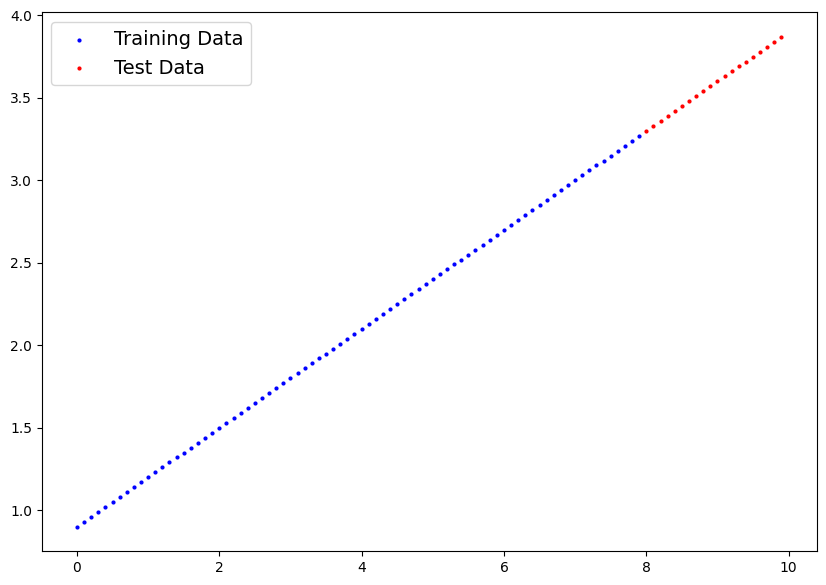

In [23]:
#Plot the training and testing data so it becomes visual.
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    
    plt.scatter(test_data, test_labels, c="r", s=4, label="Test Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})

plot_predictions()

In [27]:
# Build a PyTorch model by subclassing nn.Module.
# Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
# Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                               dtype=torch.float64),
                                   requires_grad=True)
        
        self.bias = nn.Parameter(torch.randn(1, 
                                               dtype=torch.float64),
                                   requires_grad=True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
        

#Once you've constructed the model, make an instance of it and check its state_dict().
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [44]:
#Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
#Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the 
#model parameters from the model you created in 2.

loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [45]:
# Write a training loop to perform the appropriate training steps for 300 epochs.
# The training loop should test the model on the test dataset every 20 epochs.
epochs = 300

for epoch in range(epochs):
    model_1.train()
    
    y_prediction = model_1.forward(X_train)
    
    loss = loss_function(y_prediction, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        model_1.eval()
        with torch.inference_mode():
            test_pred = model_1(X_test)
            test_loss = loss_function(test_pred, y_test)
model_1.state_dict()

OrderedDict([('weights', tensor([0.3000], dtype=torch.float64)),
             ('bias', tensor([0.8999], dtype=torch.float64))])

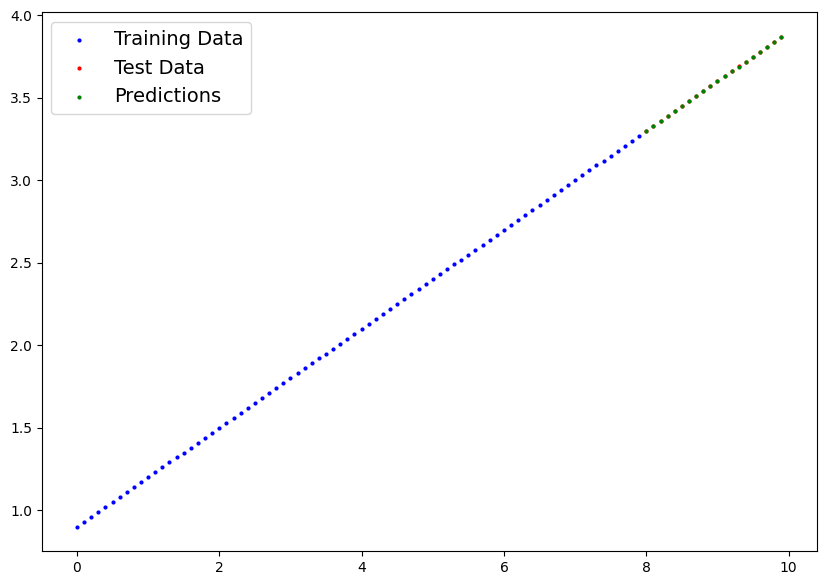

In [46]:
# Make predictions with the trained model on the test data.
# Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
model_1.eval()
with torch.inference_mode():
    preds = model_1(X_test)

plot_predictions(predictions=preds)

In [48]:
# Save your trained model's state_dict() to file.
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_exercise_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

In [50]:
# Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
model_2 = LinearRegressionModel()
model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [51]:
# Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.
model_2.eval()
with torch.inference_mode():
    preds_2 = model_2(X_test)
    
preds == preds_2

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])